<a href="https://colab.research.google.com/github/paul821/ra/blob/main/ra_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

1. Download quarterly data for GDP, real GDP, and CPI from FRED, covering the period from the 1990s to today.

In [ ]:
gdp = pd.read_csv('GDP.csv')
real_gdp = pd.read_csv('GDPC1.csv')
cpi = pd.read_csv('CPALTT01USQ657N.csv')

gdp = gdp[:-1]
real_gdp = real_gdp[:-1]

In [ ]:
df = pd.merge(pd.merge(gdp, real_gdp, on='DATE'), cpi, on='DATE')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.rename(columns={'CPALTT01USQ657N': 'CPI', 'GDPC1': 'Real GDP'})
df.head()


,DATE,GDP,Real GDP,CPI
0,1990-01-01,5872.701,10047.386,1.721398
1,1990-04-01,5960.028,10083.855,1.015361
2,1990-07-01,6015.116,10090.569,1.726804
3,1990-10-01,6004.733,9998.704,1.621485
4,1991-01-01,6035.178,9951.916,0.822737


2. Calculate the growth rates for both GDP and real GDP.

In [ ]:
df['GDP Growth Rate'] = df['GDP'].pct_change() * 100

df['Real GDP Growth Rate'] = df['Real GDP'].pct_change() * 100

print(df.head())

        DATE       GDP   Real GDP       CPI  GDP Growth Rate  \
0 1990-01-01  5872.701  10047.386  1.721398              NaN   
1 1990-04-01  5960.028  10083.855  1.015361         1.486999   
2 1990-07-01  6015.116  10090.569  1.726804         0.924291   
3 1990-10-01  6004.733   9998.704  1.621485        -0.172615   
4 1991-01-01  6035.178   9951.916  0.822737         0.507017   

   Real GDP Growth Rate  
0                   NaN  
1              0.362970  
2              0.066582  
3             -0.910405  
4             -0.467941  


3. Compute the GDP deflator.

In [ ]:
df['GDP Deflator'] = (df['GDP'] / df['Real GDP']) * 100

print(df.head())

        DATE       GDP   Real GDP       CPI  GDP Growth Rate  \
0 1990-01-01  5872.701  10047.386  1.721398              NaN   
1 1990-04-01  5960.028  10083.855  1.015361         1.486999   
2 1990-07-01  6015.116  10090.569  1.726804         0.924291   
3 1990-10-01  6004.733   9998.704  1.621485        -0.172615   
4 1991-01-01  6035.178   9951.916  0.822737         0.507017   

   Real GDP Growth Rate  GDP Deflator  
0                   NaN     58.450039  
1              0.362970     59.104658  
2              0.066582     59.611267  
3             -0.910405     60.055113  
4             -0.467941     60.643378  


4. Report the correlation between inflation and the GDP deflator.

In [ ]:
correlation = df['CPI'].corr(df['GDP Deflator'])

print(f"Correlation between CPI and GDP Deflator: {correlation}")


Correlation between CPI and GDP Deflator: 0.02558828902177868


5. Download the EPU index from its official website.

In [ ]:
epu = pd.read_excel('US_Policy_Uncertainty_Data.xlsx').drop('Three_Component_Index', axis=1)
epu = epu[:-1] #drop the source: XXXX row
epu.head()

,Year,Month,News_Based_Policy_Uncert_Index
0,1985,1.0,103.748803
1,1985,2.0,78.313193
2,1985,3.0,100.761475
3,1985,4.0,84.778863
4,1985,5.0,98.053653


6. Calculate the quarterly average of the EPU index.

In [ ]:
epu['Quarter'] = (epu['Month'] - 1) // 3 + 1

epu['EPU_qavg'] = epu.groupby(['Year','Quarter'])['News_Based_Policy_Uncert_Index'].transform('mean')

epu = epu.drop(['Month','News_Based_Policy_Uncert_Index'], axis=1).drop_duplicates()

epu['YearQuarter'] = epu['Year'].astype(str) + 'Q' + epu['Quarter'].astype(str)
epu['YearQuarter'] = epu['YearQuarter'].str[:-2]
epu['DATE'] = pd.to_datetime(epu['YearQuarter'].str[:4] + '-' +
                             (epu['YearQuarter'].str[5:].astype(int) * 3 - 2).astype(str) + '-01')
epu = epu[:-1] #drop 2024Q2
df = pd.merge(df, epu, on='DATE')
df = df.drop(['Year','Quarter','YearQuarter'], axis=1)

print(df.head())

        DATE       GDP   Real GDP       CPI  GDP Growth Rate  \
0 1990-01-01  5872.701  10047.386  1.721398              NaN   
1 1990-04-01  5960.028  10083.855  1.015361         1.486999   
2 1990-07-01  6015.116  10090.569  1.726804         0.924291   
3 1990-10-01  6004.733   9998.704  1.621485        -0.172615   
4 1991-01-01  6035.178   9951.916  0.822737         0.507017   

   Real GDP Growth Rate  GDP Deflator    EPU_qavg  
0                   NaN     58.450039  102.409723  
1              0.362970     59.104658   95.566816  
2              0.066582     59.611267  130.513768  
3             -0.910405     60.055113  141.394795  
4             -0.467941     60.643378  139.488697  


7. Calculate the correlation between the quarterly EPU index and both GDP (nominal and real).

In [ ]:
correlation = df['EPU_qavg'].corr(df['GDP'])

print(f"Correlation between EPU and GDP: {correlation}")

Correlation between EPU and GDP: 0.5174170096854263


In [ ]:
correlation = df['EPU_qavg'].corr(df['Real GDP'])

print(f"Correlation between EPU and real GDP: {correlation}")

Correlation between EPU and real GDP: 0.49456563454499114


8. Plot the following series: real GDP, nominal GDP, CPI, GDP deflator, and the quarterly EPU index.

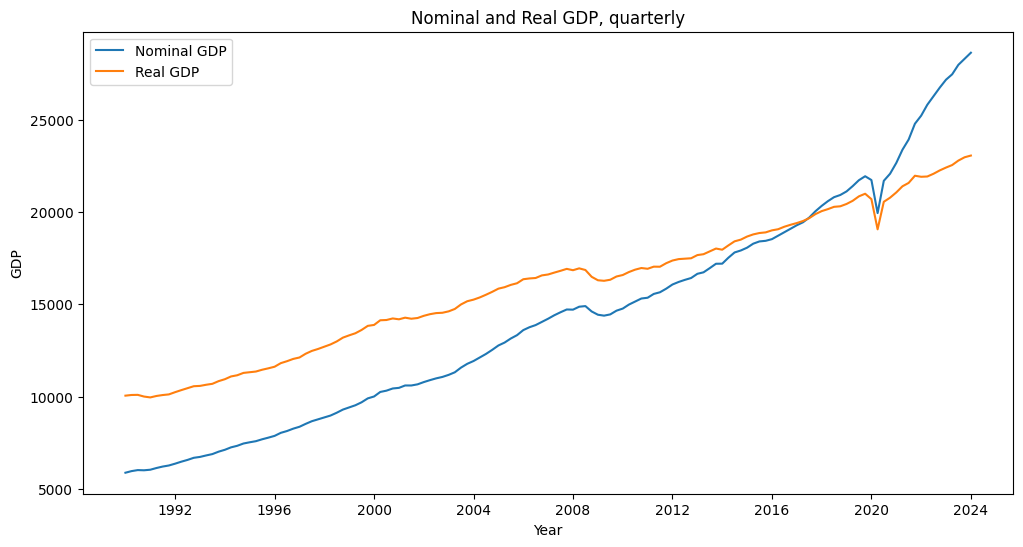

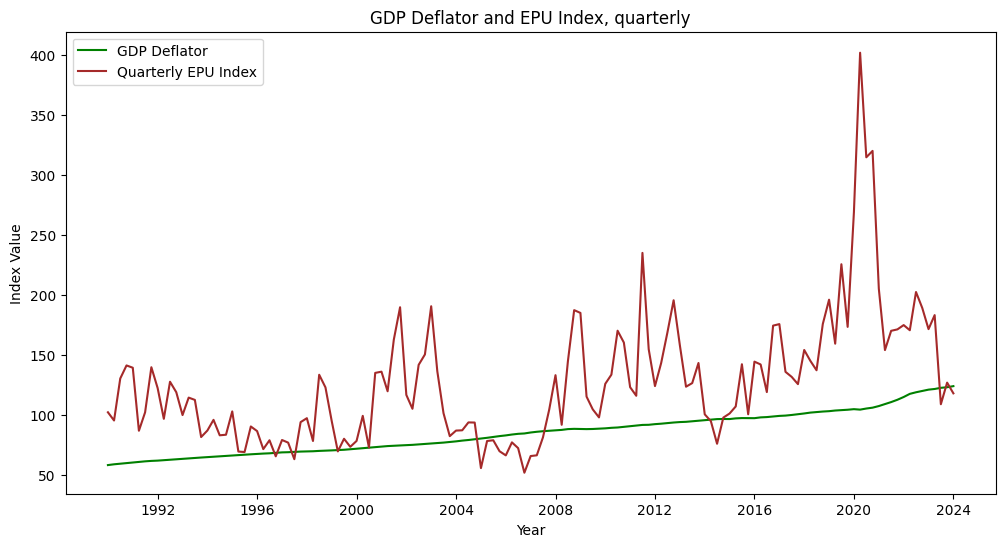

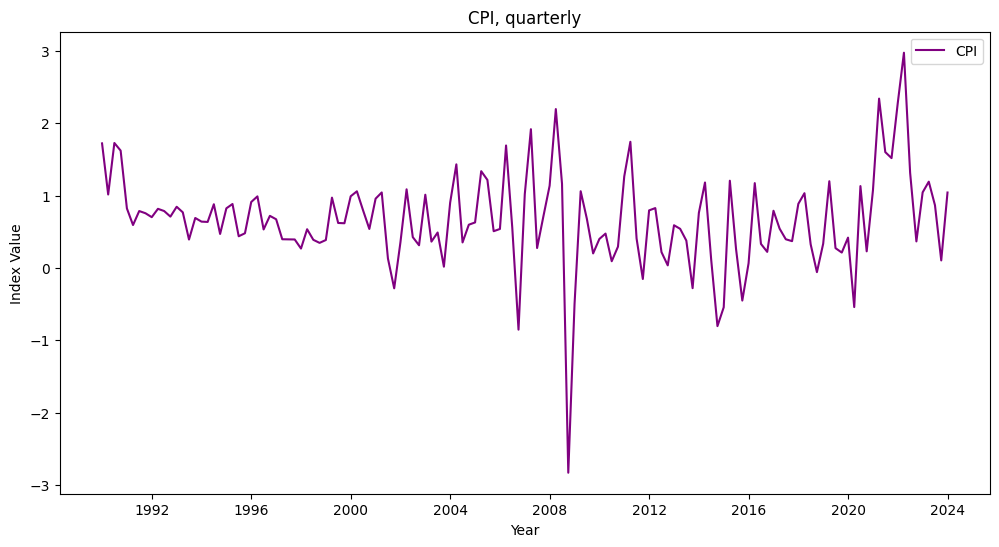

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['GDP'], label='Nominal GDP')
plt.plot(df['DATE'], df['Real GDP'], label='Real GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Nominal and Real GDP, quarterly')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['GDP Deflator'], label='GDP Deflator', color='green')
plt.plot(df['DATE'], df['EPU_qavg'], label='Quarterly EPU Index', color='brown')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('GDP Deflator and EPU Index, quarterly')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['CPI'], label='CPI', color='purple')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('CPI, quarterly')
plt.legend()
plt.show()


9. Save the final dataset with all variables as a quarterly Excel file.

In [ ]:
df.to_excel('final data.xlsx', index=False)
